In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
LS_DIR = []
ROOTS = [
    os.path.join("/home", "niche", "COLO"),
    os.path.join("/projects", "niche_squad", "COLO"),]
for root in ROOTS:
    DIR_OUT = os.path.join(root, "out", "b0313")
    LS_DIR += [os.path.join(DIR_OUT, f) for f in os.listdir(DIR_OUT) if "csv" not in f]
LS_DIR

['/home/niche/COLO/out/b0313/b_light',
 '/home/niche/COLO/out/b0313/a1_t2s',
 '/home/niche/COLO/out/b0313/a2_s2t',
 '/home/niche/COLO/out/b0313/0_all',
 '/home/niche/COLO/out/b0313/2_side',
 '/home/niche/COLO/out/b0313/c_external',
 '/home/niche/COLO/out/b0313/3_external',
 '/home/niche/COLO/out/b0313/1_top',
 '/projects/niche_squad/COLO/out/b0313/0_all',
 '/projects/niche_squad/COLO/out/b0313/2_side',
 '/projects/niche_squad/COLO/out/b0313/b_light',
 '/projects/niche_squad/COLO/out/b0313/3_external',
 '/projects/niche_squad/COLO/out/b0313/c_external',
 '/projects/niche_squad/COLO/out/b0313/a1_t2s',
 '/projects/niche_squad/COLO/out/b0313/a2_s2t',
 '/projects/niche_squad/COLO/out/b0313/1_top']

In [3]:
data = pd.read_csv(os.path.join(LS_DIR[0], "results.csv"))
for i in range(1, len(LS_DIR)):
    data_tmp = pd.read_csv(os.path.join(LS_DIR[i], "results.csv"))
    data = pd.concat([data, data_tmp])
data

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.3073,0.5695,0.7543,0.4954,0.5980,436,145,677,b_light,yolov9c,16
1,0.4188,0.7324,0.8092,0.6193,0.7016,436,122,138,b_light,yolov9c,32
2,0.5009,0.8019,0.8862,0.6995,0.7819,436,92,104,b_light,yolov9c,64
3,0.5605,0.8787,0.8753,0.7959,0.8337,436,90,45,b_light,yolov9c,128
4,0.5611,0.8663,0.9020,0.7602,0.8251,436,90,56,b_light,yolov9c,256
...,...,...,...,...,...,...,...,...,...,...,...
911,0.7914,0.9763,0.9842,0.9357,0.9594,451,22,15,1_top,yolov9c_2_side,500
912,0.5635,0.8349,0.6319,0.8293,0.7172,451,31,3978,1_top,yolov9e,16
913,0.6710,0.9217,0.9560,0.8492,0.8994,451,44,85,1_top,yolov9e_2_side,16
914,0.6145,0.9018,0.9059,0.8328,0.8678,451,46,141,1_top,yolov9e,32


In [4]:
data.query("n == 16").groupby(["config", "model", "n"]).aggregate(["count"]).reset_index()

,config,model,n,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp
,,,,count,count,count,count,count,count,count,count
0,0_all,yolov8m,16,49,49,49,49,49,49,49,49
1,0_all,yolov8n,16,50,50,50,50,50,50,50,50
2,0_all,yolov8x,16,49,49,49,49,49,49,49,49
3,0_all,yolov9c,16,51,51,51,51,51,51,51,51
4,0_all,yolov9e,16,51,51,51,51,51,51,51,51
5,1_top,yolov8m,16,25,25,25,25,25,25,25,25
6,1_top,yolov8m_2_side,16,25,25,25,25,25,25,25,25
7,1_top,yolov8n,16,25,25,25,25,25,25,25,25
8,1_top,yolov8n_2_side,16,25,25,25,25,25,25,25,25


## Data manipulation

In [5]:
data_long = data.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
# if model contain "_", the column 'ft' is checked
data_long["ft"] = data_long.model.str.contains("_")
# the first 5 letters of 'model' is the column 'backbone'
data_long["backbone"] = data_long.model.str[:7]
data_long["ver"] = data_long.model.str[4:6]
# parameters
sizes = dict({
    "yolov8n": 3.2,
    "yolov8m": 25.9,
    "yolov8x": 68.2,
    "yolov9c": 25.3,
    "yolov9e": 57.3,
})
data_long["params"] = data_long.backbone.map(sizes)
data_long

,model,config,n,metric,value,ft,backbone,ver,params
0,yolov9c,b_light,16,map5095,0.3073,False,yolov9c,v9,25.3
1,yolov9c,b_light,32,map5095,0.4188,False,yolov9c,v9,25.3
2,yolov9c,b_light,64,map5095,0.5009,False,yolov9c,v9,25.3
3,yolov9c,b_light,128,map5095,0.5605,False,yolov9c,v9,25.3
4,yolov9c,b_light,256,map5095,0.5611,False,yolov9c,v9,25.3
...,...,...,...,...,...,...,...,...,...
89147,yolov9c_2_side,1_top,500,n_fp,15.0000,True,yolov9c,v9,25.3
89148,yolov9e,1_top,16,n_fp,3978.0000,False,yolov9e,v9,57.3
89149,yolov9e_2_side,1_top,16,n_fp,85.0000,True,yolov9e,v9,57.3
89150,yolov9e,1_top,32,n_fp,141.0000,False,yolov9e,v9,57.3


In [6]:
# summarize map50-95 for each config and model for mean and sd
data_sum = data_long.query("metric == 'map5095' and n == 500").\
    groupby(["config", "model", "n", "metric", "ft"]).\
        aggregate(["mean", "std"]).reset_index()
data_sum.head(5)

/localscratch/ipykernel_26726/4258037745.py:2: FutureWarning: ['backbone', 'ver'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_sum = data_long.query("metric == 'map5095' and n == 500").\


config    model    n   metric     ft     value           params     
                                            mean       std   mean  std
0  0_all  yolov8m  500  map5095  False  0.651292  0.005105   25.9  0.0
1  0_all  yolov8n  500  map5095  False  0.642128  0.004063    3.2  0.0
2  0_all  yolov8x  500  map5095  False  0.646106  0.004127   68.2  0.0
3  0_all  yolov9c  500  map5095  False  0.651316  0.005227   25.3  0.0
4  0_all  yolov9e  500  map5095  False  0.655120  0.004072   57.3  0.0

In [7]:
print(data_long.head(5))
print(data_long.config.unique())
print(data_long.model.unique())
print(data_long.metric.unique())

     model   config    n   metric   value     ft backbone ver  params
0  yolov9c  b_light   16  map5095  0.3073  False  yolov9c  v9    25.3
1  yolov9c  b_light   32  map5095  0.4188  False  yolov9c  v9    25.3
2  yolov9c  b_light   64  map5095  0.5009  False  yolov9c  v9    25.3
3  yolov9c  b_light  128  map5095  0.5605  False  yolov9c  v9    25.3
4  yolov9c  b_light  256  map5095  0.5611  False  yolov9c  v9    25.3
['b_light' 'a1_t2s' 'a2_s2t' '0_all' '2_side' 'c_external' '3_external'
 '1_top']
['yolov9c' 'yolov9e' 'yolov8n' 'yolov8m' 'yolov8x' 'yolov9c_1_top'
 'yolov9e_1_top' 'yolov8n_1_top' 'yolov8m_1_top' 'yolov8x_1_top'
 'yolov9c_0_all' 'yolov9e_0_all' 'yolov8n_0_all' 'yolov8m_0_all'
 'yolov8x_0_all' 'yolov9c_2_side' 'yolov9e_2_side' 'yolov8n_2_side'
 'yolov8m_2_side' 'yolov8x_2_side']
['map5095' 'map50' 'precision' 'recall' 'f1' 'n_all' 'n_fn' 'n_fp']


In [8]:
file_out =  os.path.join("/home", "niche", "COLO", "out", "b0313")
data_long.to_csv(os.path.join(file_out, "out.csv"), index=False)
data_sum.to_csv(os.path.join(file_out, "summary.csv"), index=False)

## Objective 1: Breakdown of the model generalization performance

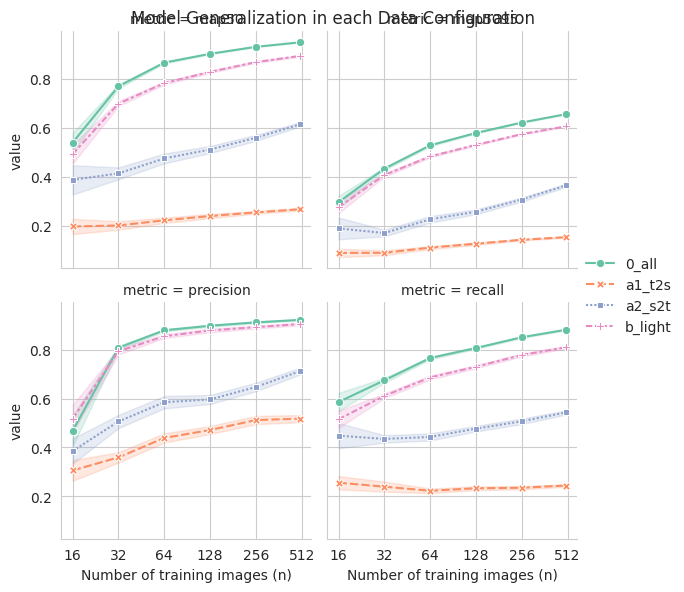

In [9]:
sns.set_style("whitegrid")
data_fig = data_long.\
    query("model == 'yolov9e'").\
    query('config in ["0_all", "a1_t2s", "a2_s2t", "b_light"]')

g = sns.FacetGrid(data_fig,
    col="metric",
    col_order=["map50", "map5095", "precision", "recall"],
    col_wrap=2,
    margin_titles=True,
    sharey="row",
)
g.map_dataframe(sns.lineplot, 
    x="n", y="value", 
    hue="config", style="config",
    hue_order=["0_all", "a1_t2s", "a2_s2t", "b_light"],
    style_order=["0_all", "a1_t2s", "a2_s2t", "b_light"],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
# title
g.figure.subplots_adjust(right=1.2)
g.figure.suptitle("Model Generalization in each Data Configuration")
g.set(
    xscale="log",
    xticks=[2**i for i in range(4, 10)],
    xticklabels=[2**i for i in range(4, 10)],
    xlabel="Number of training images (n)",)
g.add_legend()

### Model sizes
| Model | Size |
| --- | --- |
|YOLOV8n|3.2M|
|YOLOv9c| 25.3M|
|YOLOv9e| 57.3M|
|YOLOv8x| 68.2M|

In [10]:
data_long.head(3)
data_long.model.unique()
data_long.\
    query("n == 500").\
    query("model in ['yolov8n', 'yolov8x', 'yolov9c', 'yolov9e']").\
    query('config in ["0_all"]')

,model,config,n,metric,value,ft,backbone,ver,params
1753,yolov9c,0_all,500,map5095,0.6461,False,yolov9c,v9,25.3
1759,yolov9e,0_all,500,map5095,0.6634,False,yolov9e,v9,57.3
1765,yolov8n,0_all,500,map5095,0.6341,False,yolov8n,v8,3.2
1777,yolov8x,0_all,500,map5095,0.6442,False,yolov8x,v8,68.2
1783,yolov9c,0_all,500,map5095,0.6511,False,yolov9c,v9,25.3
...,...,...,...,...,...,...,...,...,...
83757,yolov8n,0_all,500,n_fp,150.0000,False,yolov8n,v8,3.2
83769,yolov8x,0_all,500,n_fp,108.0000,False,yolov8x,v8,68.2
83775,yolov9c,0_all,500,n_fp,134.0000,False,yolov9c,v9,25.3
83781,yolov9e,0_all,500,n_fp,111.0000,False,yolov9e,v9,57.3


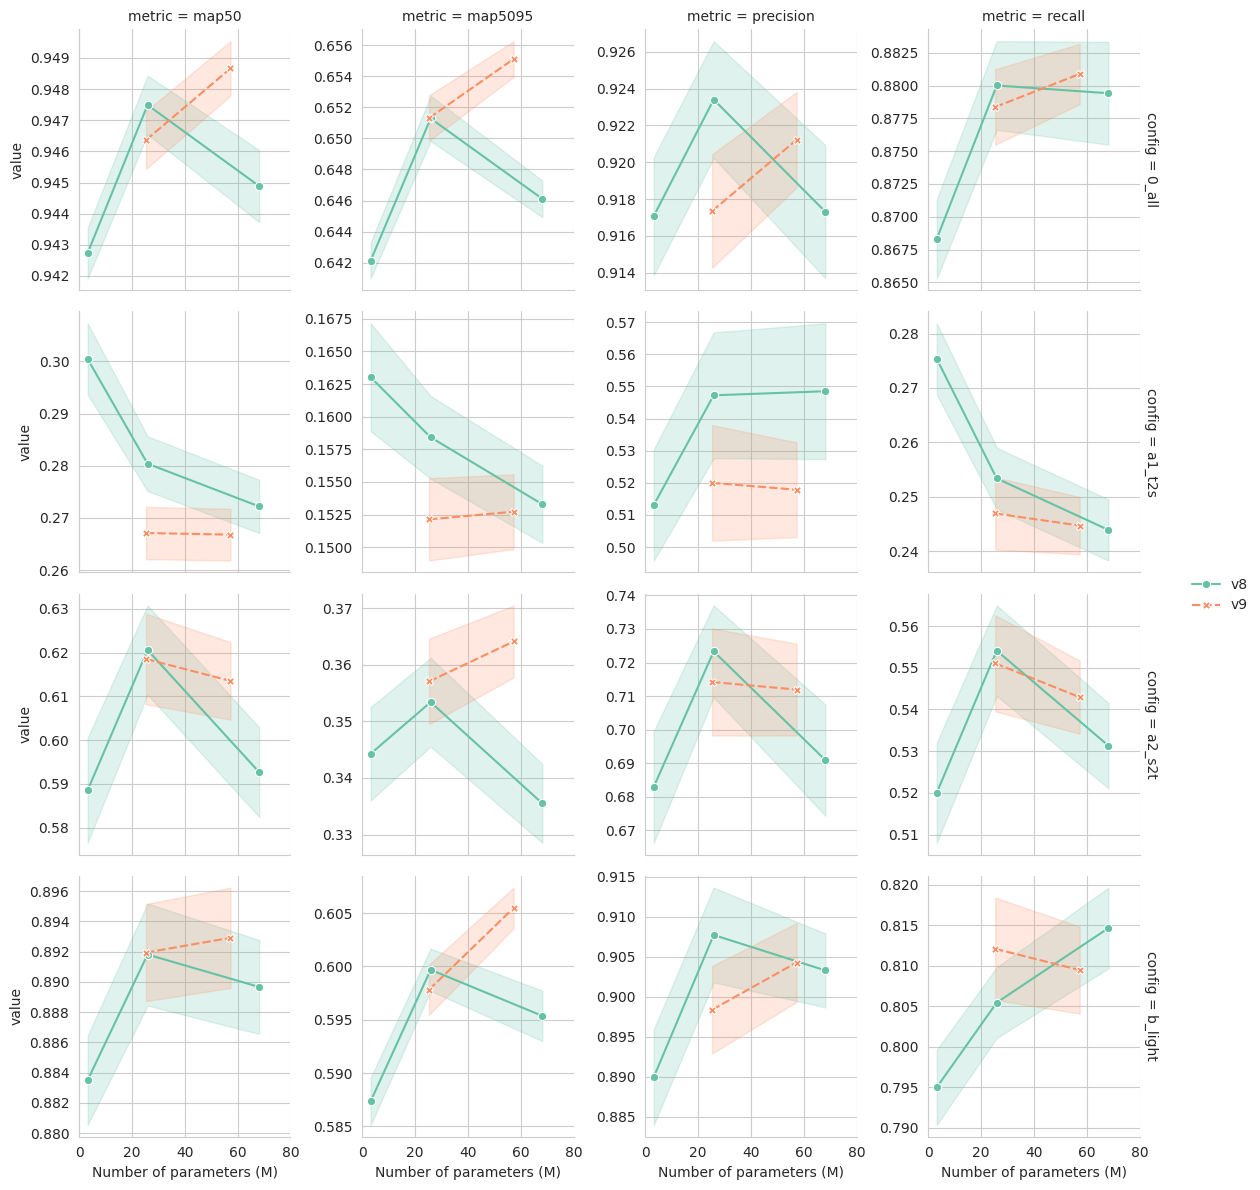

In [11]:
sns.set_style("whitegrid")
g = sns.FacetGrid(data_long.\
    query("n == 500").\
    query("model in ['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e']"),
    # query('config in ["0_all", "a1_t2s", "a2_s2t", "b_light", "c_external"]'),
    # query('config in ["0_all"]'),
    col="metric",
    col_order=["map50", "map5095", "precision", "recall"],
    row="config",
    row_order=["0_all", "a1_t2s", "a2_s2t", "b_light"],
    margin_titles=True,
    sharey=False,
)
g.map_dataframe(sns.lineplot,
    x="params", y="value",
    hue="ver", style="ver",
    hue_order=['v8', 'v9'],
    style_order=['v8', 'v9'],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
g.set(
    xticks=[i for i in range(0, 100, 20)],
    xticklabels=[i for i in range(0, 100, 20)],
    xlabel="Number of parameters (M)")
g.add_legend()

## Objective 2: Fine-tuned performance comparison

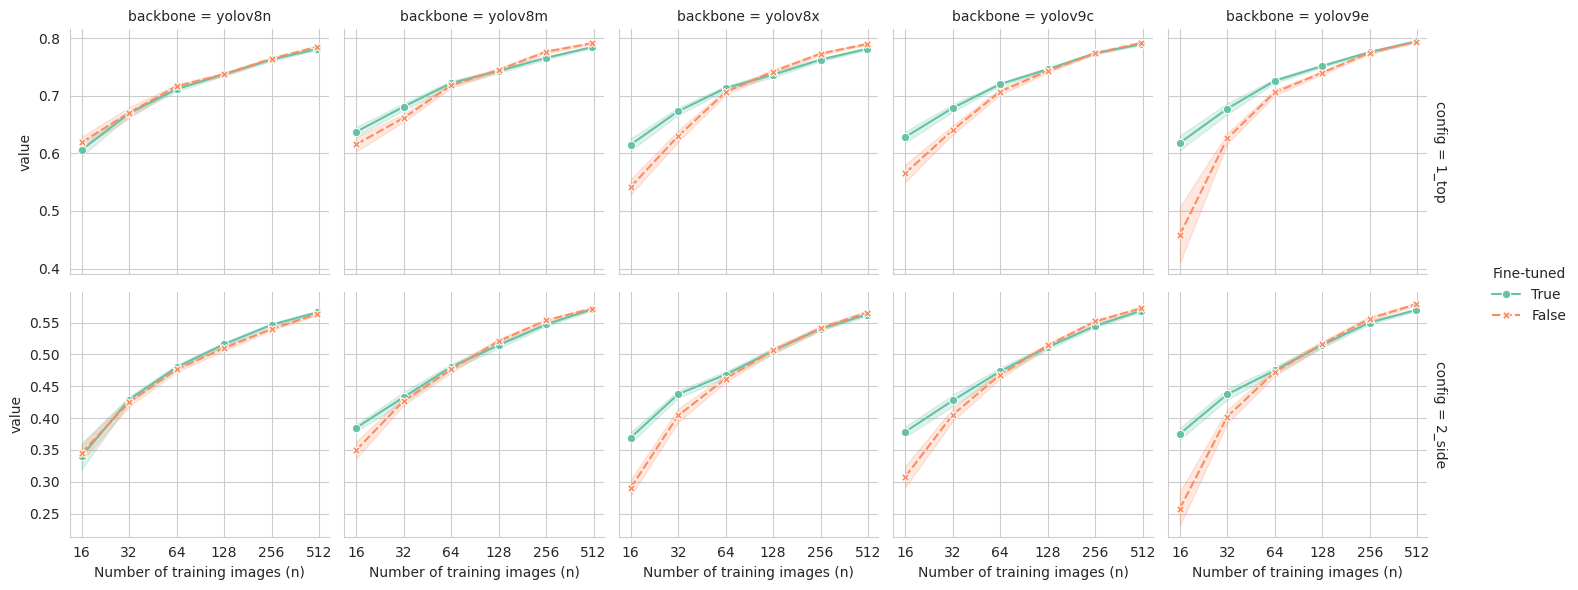

In [12]:
sns.set_style("whitegrid")
g = sns.FacetGrid(data_long.\
    query("metric=='map5095'"),
    col="backbone",
    col_order=['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e'],
    row="config",
    row_order=["1_top", "2_side"],
    margin_titles=True,
    sharey="row",
)
g.map_dataframe(sns.lineplot,
    x="n", y="value",
    hue="ft", style="ft",
    hue_order=[True, False],
    style_order=[True, False],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
g.set(
    xscale="log",
    xticks=[2**i for i in range(4, 10)],
    xticklabels=[2**i for i in range(4, 10)],
    xlabel="Number of training images (n)",)
g.add_legend(title="Fine-tuned")

## Objective 3: External evaluation

In [13]:
data_long.config.unique()
data_long.head(3)

,model,config,n,metric,value,ft,backbone,ver,params
0,yolov9c,b_light,16,map5095,0.3073,False,yolov9c,v9,25.3
1,yolov9c,b_light,32,map5095,0.4188,False,yolov9c,v9,25.3
2,yolov9c,b_light,64,map5095,0.5009,False,yolov9c,v9,25.3


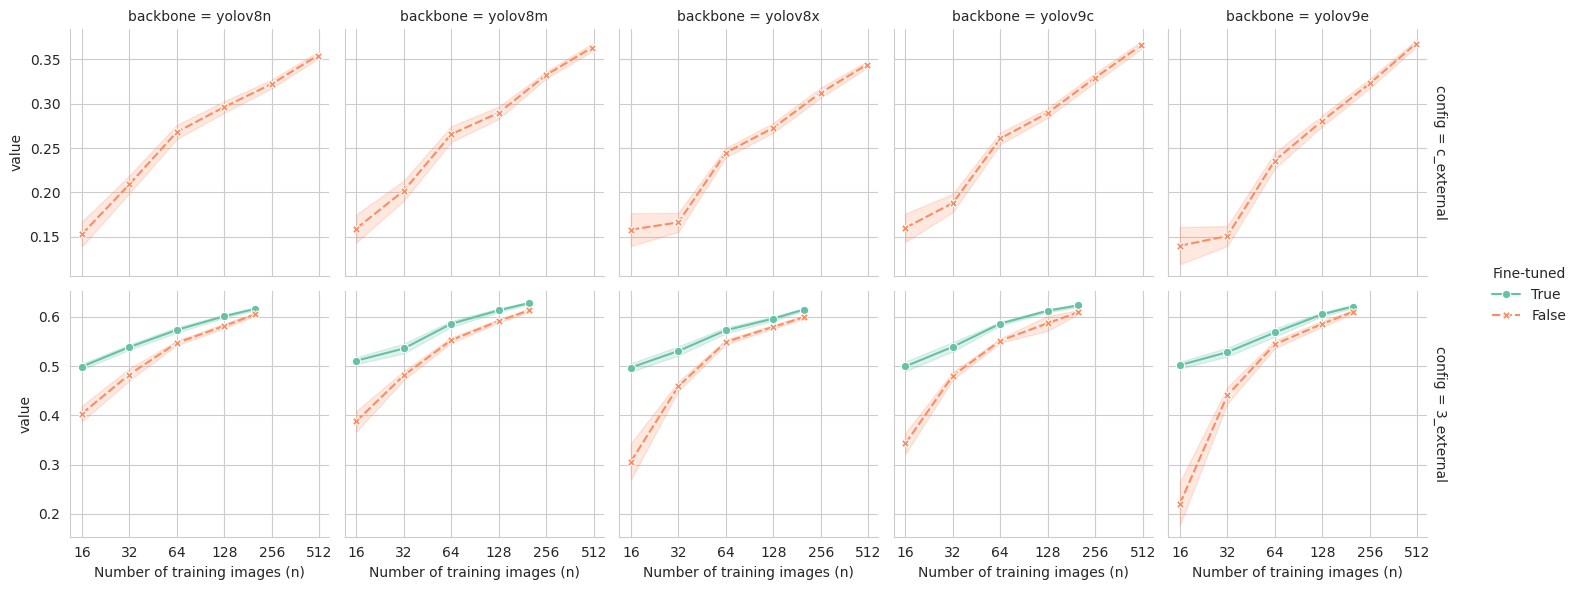

In [14]:
sns.set_style("whitegrid")
g = sns.FacetGrid(data_long.\
    query("metric=='map5095'"),
    col="backbone",
    col_order=['yolov8n', 'yolov8m', 'yolov8x', 'yolov9c', 'yolov9e'],
    row="config",
    row_order=["c_external", "3_external"],
    margin_titles=True,
    sharey="row",
)
g.map_dataframe(sns.lineplot,
    x="n", y="value",
    hue="ft", style="ft",
    hue_order=[True, False],
    style_order=[True, False],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette="Set2",)
g.set(
    xscale="log",
    xticks=[2**i for i in range(4, 10)],
    xticklabels=[2**i for i in range(4, 10)],
    xlabel="Number of training images (n)",)
g.add_legend(title="Fine-tuned")

## Metric correlation

In [17]:
data.head(5)

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.3073,0.5695,0.7543,0.4954,0.5980,436,145,677,b_light,yolov9c,16
1,0.4188,0.7324,0.8092,0.6193,0.7016,436,122,138,b_light,yolov9c,32
2,0.5009,0.8019,0.8862,0.6995,0.7819,436,92,104,b_light,yolov9c,64
3,0.5605,0.8787,0.8753,0.7959,0.8337,436,90,45,b_light,yolov9c,128
4,0.5611,0.8663,0.9020,0.7602,0.8251,436,90,56,b_light,yolov9c,256


In [29]:
sns.pairplot(data.loc[:, ["map5095", "map50", "precision", "recall", "n"]],
             hue="n",
             hue_order=[16, 32, 64, 128, 256, 500],
             plot_kws={"s": 50, "alpha": 0.4},)

## Overall

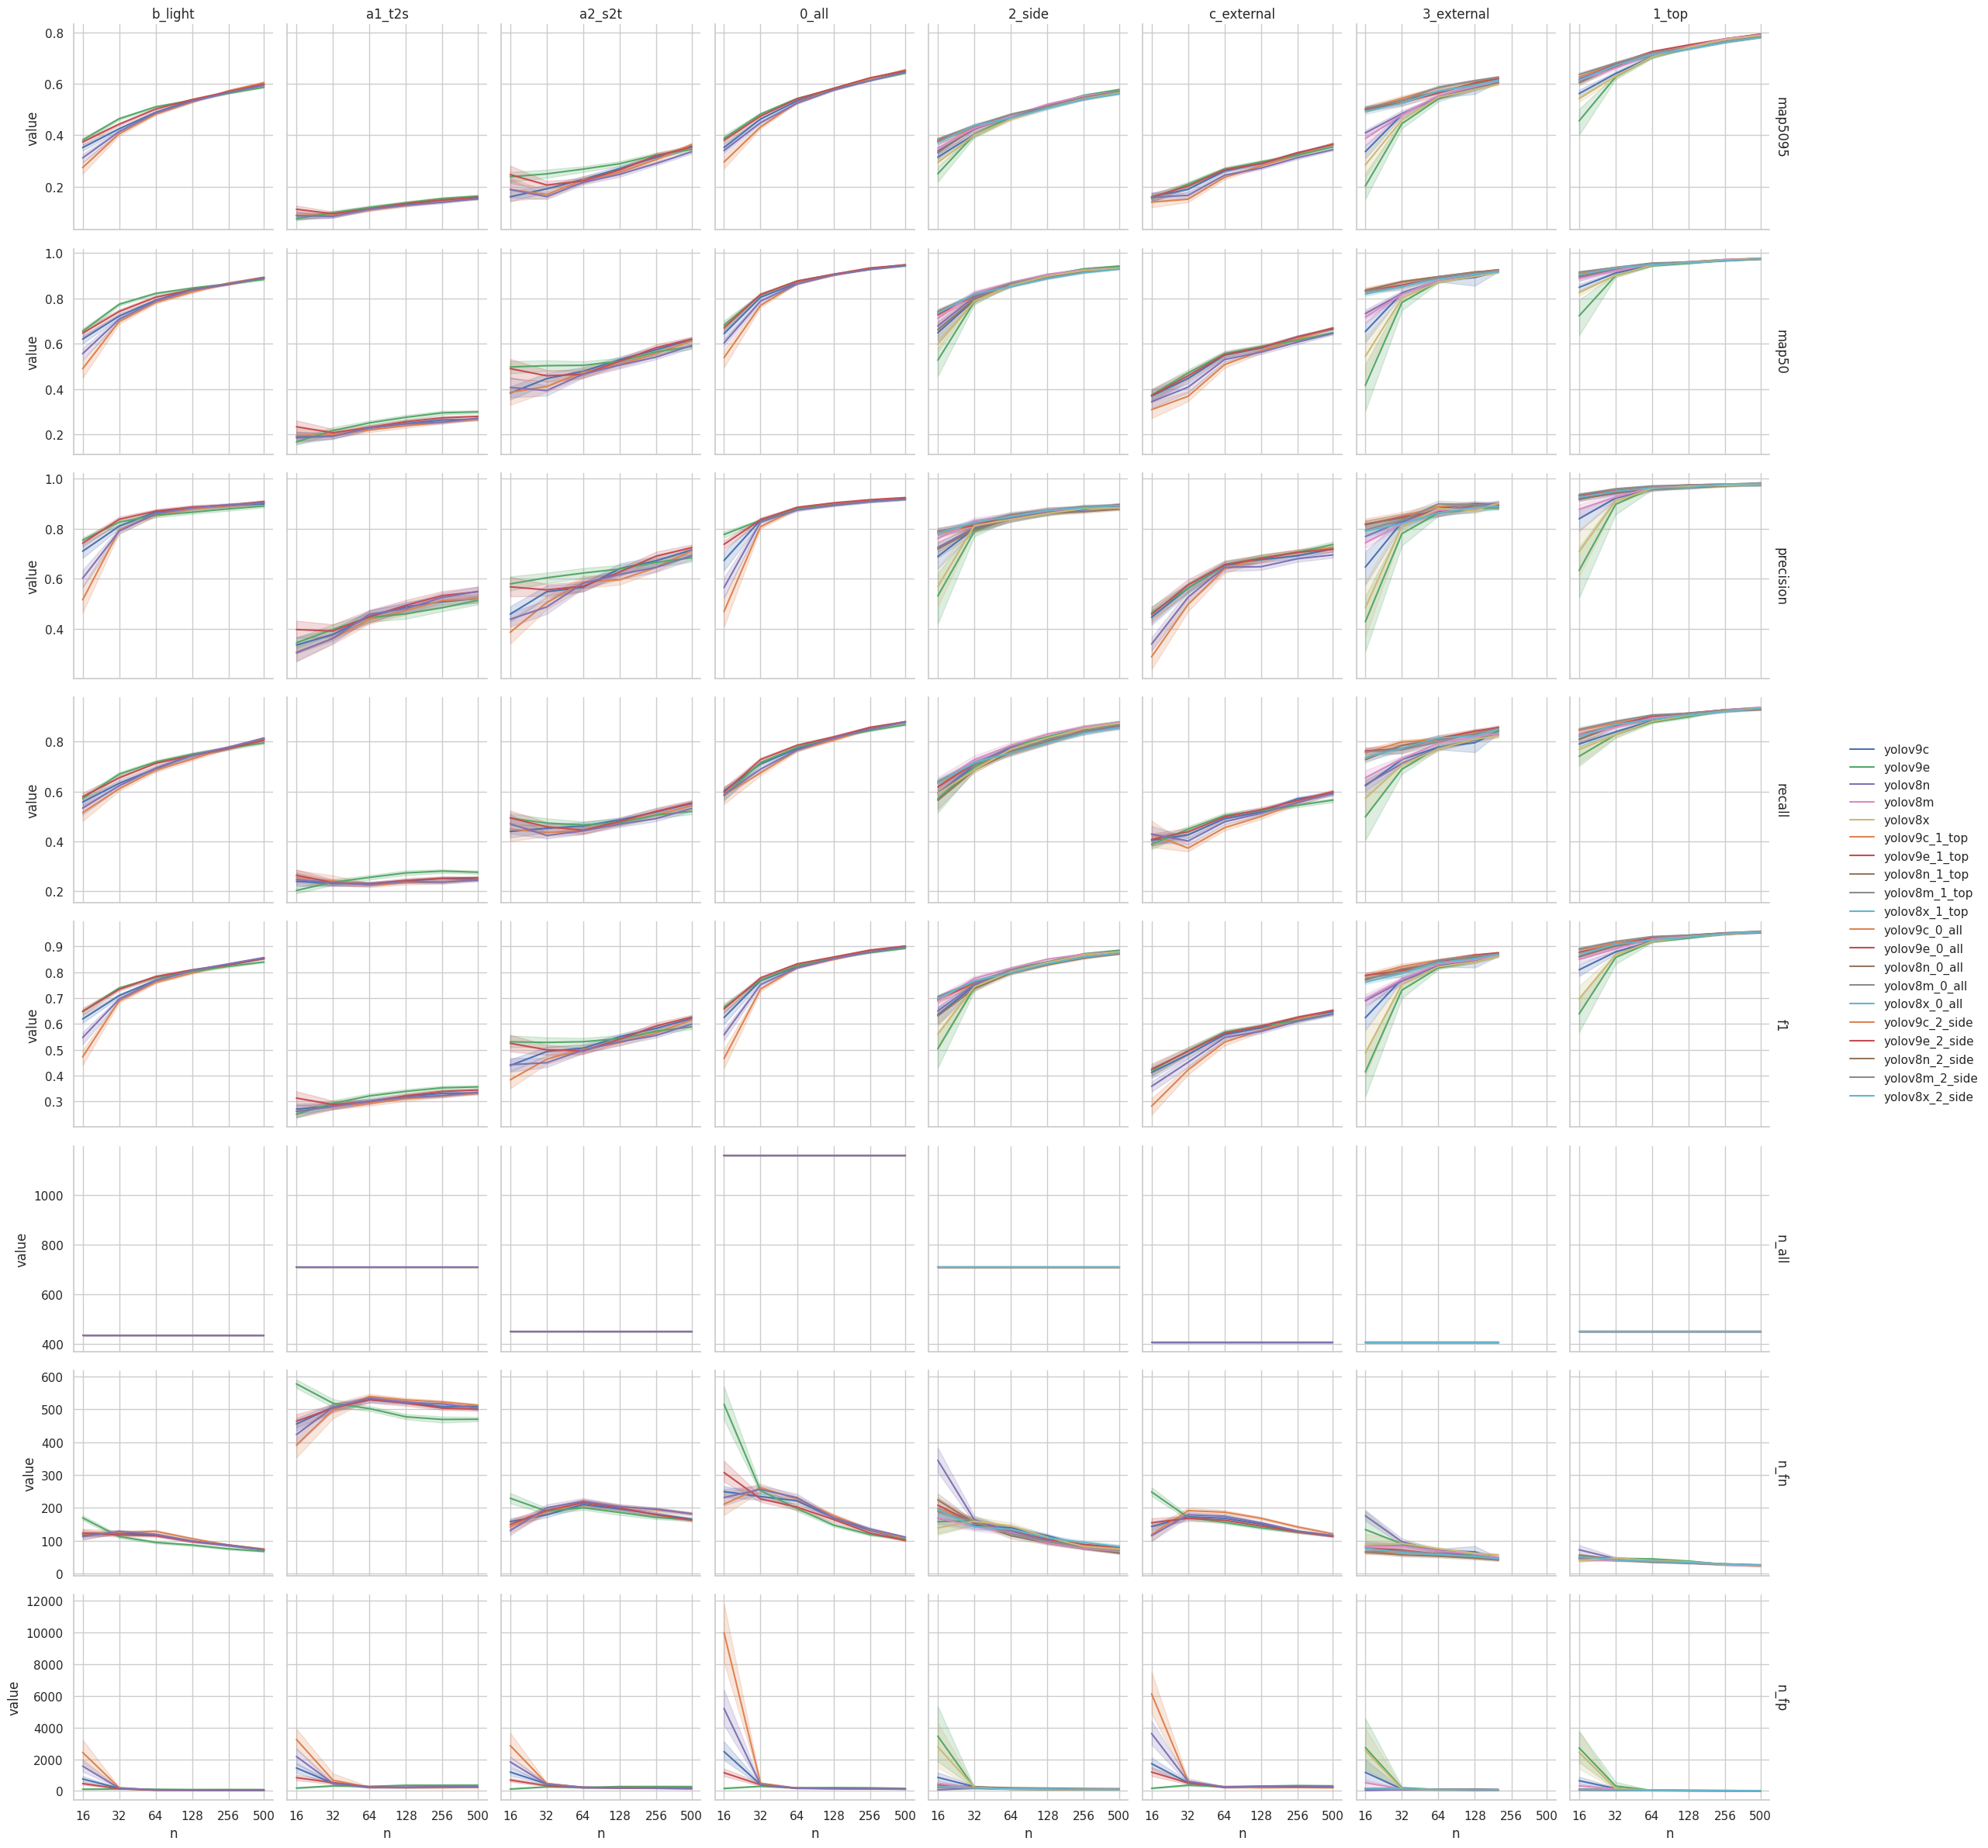

In [22]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
g.set(xscale="log")
g.set(xticks=[16, 32, 64, 128, 256, 500], 
      xticklabels=[16, 32, 64, 128, 256, 500])
plt.show()